# Final Project - Student Performance analysis
## Description
For the final project I am doing an analysis on if there are correlation with Student final grades, percentage with attendance, instructor or particular course 


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
sns.set()

## Loading data set 

Data sets are pulled from 
CANVAS LMS https://canvas.instructure.com/doc/api/quiz_submission_events.html via REST API's where students courses and attendance data are stored
one45 Webeval https://api.one45.com/api/docs/all via ReST API's where students grade books are stored.

Implement a data flow using https://airflow.apache.org/ where we are (Extract, Transform(Combine), Load) data from both system into a datawarehouse (On Amazon AWS)

Then a sql query is run to formulate data set and export it to CSV. 

There are definitely some data quality issue with both systems where we extracted over 250,000 records from each of the system however, when combined only ~3000 rows of record has a good match betweeen the 2. It is mainly due to lack of common identifier between the 2 vendor and also naming inconsitnecy across names between the 2 system. 

In [87]:

learner_grades = pd.read_csv('learner_grades.csv',index_col=0)
learner_grades.sample(5)

,full_name,learning_event_key,learning_event,instructor,instructor_id,attendance_percentage,final_letter_grade,final_percentage
learner_key,,,,,,,,
2895,"Flores, Madeline",42239,AY17-18 CIRC 6013-2020 FormandFunc Skin Muscl...,Kristin Fiebelkorn,1047,1.00,A,88
3073,"Hardy, Gwendolyn",40043,AY16-17 CIRC 5009-2020 Attack and Defense,Renee Brown,742,1.00,B,79
2392,"Amuneke-Nze, Chidimma",40037,AY16-17 CIRC 5003-2020 Language of Medicine (...,Linda Johnson,1354,1.00,A,88
2846,"Emadi, Marissa",41897,AY17-18 PEDI 3005-008 Pediatrics Clerkship,Christine Gaspard,4802,1.00,B,74
3633,"Mundy, Clare",41896,AY17-18 PEDI 3005-007 Pediatrics Clerkship,Christine Gaspard,4802,0.78,B,75


## Analyzing Data Set

### Letter grade count 

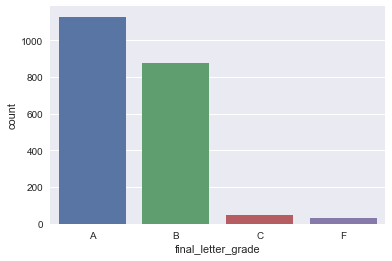

In [88]:
sns.countplot(x='final_letter_grade',data=learner_grades)

Above plot shows that there are no weird labels in the final letter grades and the data sets for A and B's are far greater than C,F so when choosing training sets has to be careful.  There are also not very much incremental steps

### Percentage Grade Distribution analysis

/Users/scotthsieh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


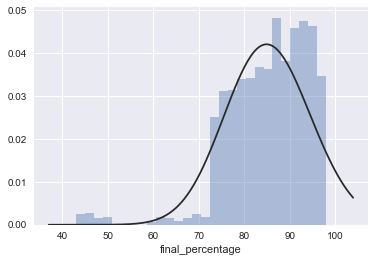

In [89]:
sns.distplot(learner_grades['final_percentage'], kde=False, fit=stats.gamma)

### Plotting Attendance vs Final Percentage 

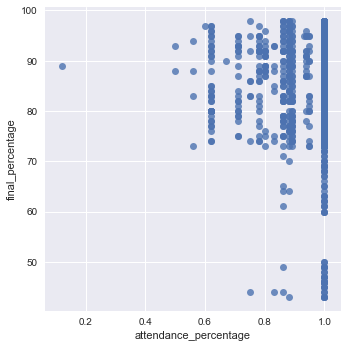

In [90]:
sns.lmplot(x='attendance_percentage', y='final_percentage', data=learner_grades, fit_reg=False)

Noticed the data set where the student scored 10% on the attendance and still scores 90% in final grade 

# Linear Regression
### predicing Attendance with Final Percentage 

In [91]:
r1 = ols("final_percentage ~ attendance_percentage", data = learner_grades).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       final_percentage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1400
Date:                Sun, 19 Aug 2018   Prob (F-statistic):              0.708
Time:                        15:40:45   Log-Likelihood:                -7579.2
No. Observations:                2086   AIC:                         1.516e+04
Df Residuals:                    2084   BIC:                         1.517e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                86.3347      2.364     36.520      0.000      81.699      90.971
attendance_percentage    -0.9100      2.432     -0.374      0.708      -5.680       3.860
==============================================================================
Omnibus:                      591.511   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1965.327
Skew:                          -1.400   Prob(JB):                         0.00
Kurtosis:                       6.843   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
train, test = model_selection.train_test_split(learner_grades)

In [74]:
train.head()

,full_name,learning_event_key,learning_event,attendance_percentage,final_letter_grade,final_percentage
learner_key,,,,,,
2730,"Cruz, Amanda",42239,AY17-18 CIRC 6013-2020 FormandFunc Skin Muscl...,1.0,B,79
3582,"Mitra, Natasha",38169,AY15-17 CIRC 5001-2019 Medicine Behavior and ...,1.0,A,87
3284,"Kennedy, Mark",38169,AY15-17 CIRC 5001-2019 Medicine Behavior and ...,1.0,A,97
3553,"Membreno, Raul",42236,AY17-18 CIRC 6007-2020 Mind Brain and Behavior,1.0,A,97
2692,"Cochran, Matthew",42239,AY17-18 CIRC 6013-2020 FormandFunc Skin Muscl...,1.0,A,88


In [75]:
test.head()

,full_name,learning_event_key,learning_event,attendance_percentage,final_letter_grade,final_percentage
learner_key,,,,,,
4333,"Wilson, John",38178,AY15-16 CIRC 5015-1ST Renal and Male Reproductive,1.0,B,82
3553,"Membreno, Raul",40039,AY16-18 CIRC 5005-2020 Clinical Skills,1.0,A,92
3146,"Hopkins, Hilary",38179,AY15-16 CIRC 5017-001 Hematology,1.0,B,78
3935,"Romere, Chase",41890,AY17-18 PEDI 3005-001 Pediatrics Clerkship,1.0,A,96
2692,"Cochran, Matthew",40041,AY16-17 CIRC 5007-2020 Molecules to Medicine,1.0,A,91
